In [96]:
#Import

from __future__ import division #division without truncating decimals
import pandas as pd #data maniputation library
pd.set_option('display.max_columns',500)
import numpy as np #numerical computation library
import datetime as dt
import matplotlib.pyplot as plt #plotting library

%matplotlib inline

In [97]:
#scraping play-by-play data from 2017 and 2018 from nflscrapR

nfl_2017 = pd.read_csv('https://raw.githubusercontent.com/ryurko/nflscrapR-data/master/play_by_play_data/regular_season/reg_pbp_2017.csv', low_memory=False)
nfl_2018 = pd.read_csv('https://raw.githubusercontent.com/ryurko/nflscrapR-data/master/play_by_play_data/regular_season/reg_pbp_2018.csv', low_memory=False)

In [98]:
#converting game_date to datetime format

nfl_2017['Date'] = pd.to_datetime(nfl_2017['game_date'])
nfl_2018['Date'] = pd.to_datetime(nfl_2018['game_date'])

In [99]:
#nfl_2017 desc
nfl_2017.head()

,play_id,game_id,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,drive,sp,qtr,down,goal_to_go,time,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,pass_length,pass_location,air_yards,yards_after_catch,run_location,run_gap,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,home_timeouts_remaining,away_timeouts_remaining,timeout,timeout_team,td_team,posteam_timeouts_remaining,defteam_timeouts_remaining,total_home_score,total_away_score,posteam_score,defteam_score,score_differential,posteam_score_post,defteam_score_post,score_differential_post,no_score_prob,opp_fg_prob,opp_safety_prob,opp_td_prob,fg_prob,safety_prob,td_prob,extra_point_prob,two_point_conversion_prob,ep,epa,total_home_epa,total_away_epa,total_home_rush_epa,total_away_rush_epa,total_home_pass_epa,total_away_pass_epa,air_epa,yac_epa,comp_air_epa,comp_yac_epa,total_home_comp_air_epa,total_away_comp_air_epa,total_home_comp_yac_epa,total_away_comp_yac_epa,total_home_raw_air_epa,total_away_raw_air_epa,total_home_raw_yac_epa,total_away_raw_yac_epa,wp,def_wp,home_wp,away_wp,wpa,home_wp_post,away_wp_post,total_home_rush_wpa,total_away_rush_wpa,total_home_pass_wpa,total_away_pass_wpa,air_wpa,yac_wpa,comp_air_wpa,comp_yac_wpa,total_home_comp_air_wpa,total_away_comp_air_wpa,total_home_comp_yac_wpa,total_away_comp_yac_wpa,total_home_raw_air_wpa,total_away_raw_air_wpa,total_home_raw_yac_wpa,total_away_raw_yac_wpa,punt_blocked,first_down_rush,first_down_pass,first_down_penalty,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,incomplete_pass,touchback,interception,punt_inside_twenty,punt_in_endzone,punt_out_of_bounds,punt_downed,punt_fair_catch,kickoff_inside_twenty,kickoff_in_endzone,kickoff_out_of_bounds,kickoff_downed,kickoff_fair_catch,fumble_forced,fumble_not_forced,fumble_out_of_bounds,solo_tackle,safety,penalty,tackled_for_loss,fumble_lost,own_kickoff_recovery,own_kickoff_recovery_td,qb_hit,rush_attempt,pass_attempt,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,kickoff_attempt,punt_attempt,fumble,complete_pass,assist_tackle,lateral_reception,lateral_rush,lateral_return,lateral_recovery,passer_player_id,passer_player_name,receiver_player_id,receiver_player_name,rusher_player_id,rusher_player_name,lateral_receiver_player_id,lateral_receiver_player_name,lateral_rusher_player_id,lateral_rusher_player_name,lateral_sack_player_id,lateral_sack_player_name,interception_player_id,interception_player_name,lateral_interception_player_id,lateral_interception_player_name,punt_returner_player_id,punt_returner_player_name,lateral_punt_returner_player_id,lateral_punt_returner_player_name,kickoff_returner_player_name,kickoff_returner_player_id,lateral_kickoff_returner_player_id,lateral_kickoff_returner_player_name,punter_player_id,punter_player_name,kicker_player_name,kicker_player_id,own_kickoff_recovery_player_id,own_kickoff_recovery_player_name,blocked_player_id,blocked_player_name,tackle_for_loss_1_player_id,tackle_for_loss_1_player_name,tackle_for_loss_2_player_id,tackle_for_loss_2_player_name,qb_hit_1_player_id,qb_hit_1_player_name,qb_hit_2_player_id,qb_hit_2_player_name,forced_fumble_player_1_team,forced_fumble_player_1_player_id,forced_fumble_player_1_player_name,forced_fumble_player_2_team,forced_fumble_player_2_player_id,forced_fumble_player_2_player_name,solo_tackle_1_team,solo_tackle_2_team,solo_tackle_1_player_id,solo_tackle_2_player_id,solo_tackle_1_player_name,solo_tackle_2_player_name,assist_tackle_1_player_id,assist_tackle_1_player_name,assist_tackle_1_team,assist_tackle_2_player_id,assist_tackle_2_player_name,assist_tackle_2_team,assist_tackle_3_player_id,assist_tackle_3_player_name,assist_tackle_3_team,assist_tackle_4_player_id,assist_tackle_4_player_name,as

In [100]:
#Creating a column with plays with LeVeon Bell was involved
nfl_2017['L.Bell'] = np.where(nfl_2017['desc'].str.contains('L.Bell'), 'yes', 'no')

In [101]:
#Creating a column with plays with James Connor was involved
nfl_2018['J.Conner'] = np.where(nfl_2018['desc'].str.contains('J.Conner'), 'yes', 'no')

In [102]:
#narrowing down the data to steelers only
steelers_17 = nfl_2017[(nfl_2017['home_team']=='PIT')| (nfl_2017["away_team"]== 'PIT')]
steelers_18 = nfl_2018[(nfl_2018['home_team']=='PIT')| (nfl_2018["away_team"]== 'PIT')]

In [103]:
#Total number of Touchdowns by Steeelers in 2017
steelers_td17 = nfl_2017[((nfl_2017['home_team'] =='PIT') | (nfl_2017["away_team"]=='PIT'))&(nfl_2017['sp']==1)&(nfl_2017['touchdown']==1)&(nfl_2017['defteam'] != 'PIT')]

In [104]:
#Total number of Touchdowns by Steerlers in 2018
steelers_td18 = nfl_2018[((nfl_2018['home_team'] =='PIT') | (nfl_2018["away_team"]=='PIT'))&(nfl_2018['sp']==1)&(nfl_2018['touchdown']==1)&(nfl_2018['defteam'] != 'PIT')]

In [105]:
#Total number of Touchdowns by LeVeon Bell in 2017 
L_Bell_td17 = steelers_td17[(steelers_td17['L.Bell'] =='yes')].touchdown.sum()

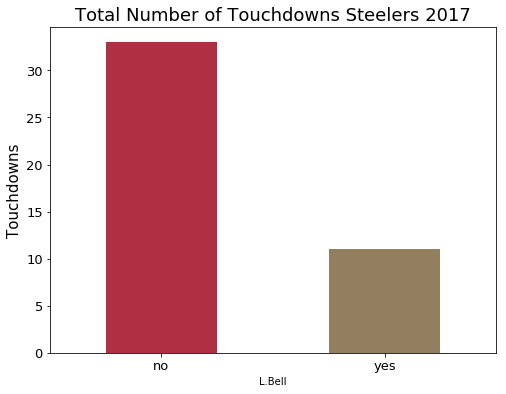

In [106]:
tds1 = steelers_td17.groupby('L.Bell').touchdown.sum()

fig, ax = plt.subplots(figsize=(8, 6), dpi = 72) # Get access to the figure and axes to modify their attributes later

ax.set_title("Total Number of Touchdowns Steelers 2017", fontsize = 18) # Chart title
#ax.set_xlabel('L. Bell', fontsize = 15) # X-axis label
ax.set_ylabel('Touchdowns', fontsize = 15) # Y-axis label
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

mycolors = ['#A6192E', '#85714D'] # Using scarlet and gold colors

tds1.plot(kind='bar', alpha = 0.9, rot=0, color = mycolors) # Plot a Bar chart
plt.show()

In [107]:
#Dataframe with Touchdowns by Leveon Bell only. 
J_Conner_td18 = steelers_td18[(steelers_td18['J.Conner'] =='yes')].touchdown.sum()

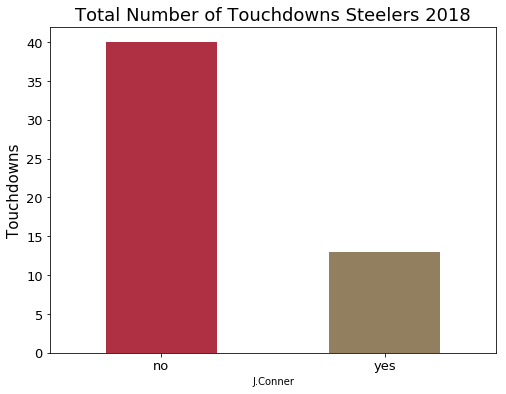

In [108]:
tds2 = steelers_td18.groupby('J.Conner').touchdown.sum()

fig, ax = plt.subplots(figsize=(8, 6), dpi = 72) # Get access to the figure and axes to modify their attributes later

ax.set_title("Total Number of Touchdowns Steelers 2018", fontsize = 18) # Chart title
#ax.set_xlabel('L. Bell', fontsize = 15) # X-axis label
ax.set_ylabel('Touchdowns', fontsize = 15) # Y-axis label
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

mycolors = ['#A6192E', '#85714D'] # Using scarlet and gold colors

tds2.plot(kind='bar', alpha = 0.9, rot=0, color = mycolors) # Plot a Bar chart
plt.show()

In [109]:
print ("Total number of touchdowns by Leveon Bell in 2017: %d" % L_Bell_td17)
print ("Total number of touchdowns by James Conner in 2018: %d" % J_Conner_td18)

Total number of touchdowns by Leveon Bell in 2017: 11
Total number of touchdowns by James Conner in 2018: 13


In [110]:
#Total number of yards gained by LeVeon Bell in 2017 per touch 
L_Bell_yds17 = (steelers_17[(steelers_17['L.Bell'] =='yes')].yards_gained.sum())/(steelers_17['L.Bell'] =='yes').sum()

In [111]:
#Total number of yards gained by James Conner in 2018 per touch
J_Conner_yds18 = (steelers_18[(steelers_18['J.Conner'] =='yes')].yards_gained.sum())/(steelers_18['J.Conner'] == 'yes').sum()

In [112]:
print ("Total number of yards per touch by Leveon Bell in 2017: %f yards/touch" % L_Bell_yds17)
print ("Total number of yards per touch by James Conner in 2018: %f yards/touch" % J_Conner_yds18)

Total number of yards per touch by Leveon Bell in 2017: 4.410835 yards/touch
Total number of yards per touch by James Conner in 2018: 4.898026 yards/touch


In [113]:
L_Bell_passtd = (steelers_17[(steelers_17['L.Bell'] =='yes')].pass_touchdown.sum())
J_Conner_passtd = (steelers_18[(steelers_18['J.Conner'] =='yes')].pass_touchdown.sum())

In [114]:
print ("Total number of pass touchdown by Leveon Bell in 2017: %d" % L_Bell_passtd)
print ("Total number of pass touchdown by James Conner in 2018: %d" % J_Conner_passtd)

Total number of pass touchdown by Leveon Bell in 2017: 2
Total number of pass touchdown by James Conner in 2018: 1


In [115]:
L_Bell_rushtd = (steelers_17[(steelers_17['L.Bell'] =='yes')].rush_touchdown.sum())
J_Conner_rushtd = (steelers_18[(steelers_18['J.Conner'] =='yes')].rush_touchdown.sum())

In [116]:
print ("Total number of rush touchdown by Leveon Bell in 2017: %d" % L_Bell_rushtd)
print ("Total number of rush touchdown by James Conner in 2018: %d" % J_Conner_rushtd)

Total number of rush touchdown by Leveon Bell in 2017: 9
Total number of rush touchdown by James Conner in 2018: 12
